<a href="https://colab.research.google.com/github/valenja9/co_python_umi/blob/main/fear%26greed%3F_index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

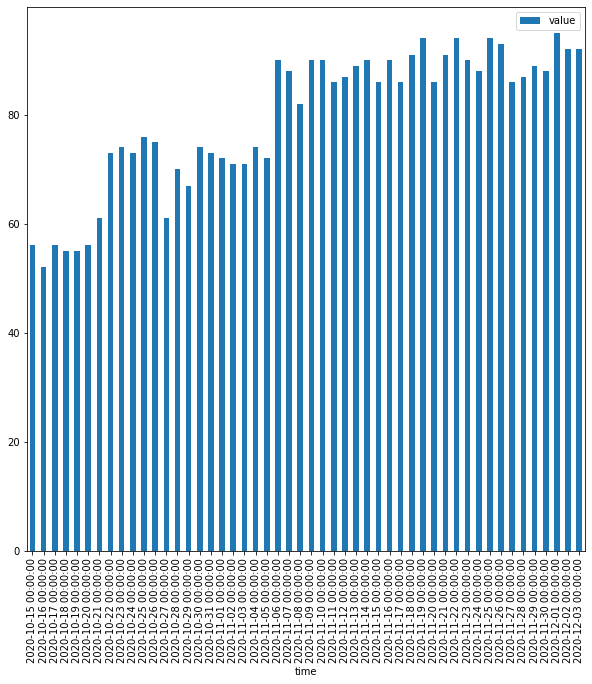

In [ ]:
import requests
import json
import datetime
import pandas as pd
import numpy as np
import datetime as dt
import math
import warnings

import pandas_datareader as web



#url api
url ="https://api.alternative.me/fng/?limit=780"
#to json
r = requests.get(url).json()

r

#uprava dat
data = {}
for i in r["data"]:
    # Do meho noveho slovniku, dle prevedeneho casu pridej list[value,clasification]
    data[str(datetime.datetime.fromtimestamp(int(i["timestamp"])).strftime("%m-%d-%Y"))] = [int(i["value"]),i["value_classification"]]


#vytvor dataframe a uprav ho.
fear_greed_dataframe=pd.DataFrame(data).T
fear_greed_dataframe.reset_index(inplace=True)
fear_greed_dataframe.columns=["time","value","classification"]
fear_greed_dataframe.time=pd.to_datetime(fear_greed_dataframe['time']) 
#graficke zobrazeni.
fear_greed_dataframe[:50].sort_values(by="time").plot.bar(x="time",y="value",figsize=(10,10))

In [ ]:
# stocks = []
# f = open("/content/crypto.txt", "r")
# for line in f:
#     stocks.append(line.strip())

# f.close()
start ="2000-1-1"
end ="2020-3-29"
# print(stocks)
pd.DataFrame(web.DataReader('BTC-USD',"yahoo",start=start,end=end)["Adj Close"]).to_csv("price_cryptoI.csv")
pd.DataFrame(web.DataReader('BTC-USD',"yahoo",start=start,end=end)["Volume"]).to_csv("volume_cryptoI.csv")

In [ ]:
prices = pd.read_csv("price_cryptoI.csv", index_col="Date", parse_dates=True)

In [ ]:
prices.head()

,Adj Close
Date,
2014-09-16,457.334015
2014-09-17,424.440002
2014-09-18,394.795990
2014-09-19,408.903992
2014-09-20,398.821014


In [ ]:
import plotly.express as px
#zobrazeni pomoci plotly
df = fear_greed_dataframe
fig = px.line(df, x='time', y='value',hover_name="classification")


fig.show()

In [ ]:
#zobrazeni pomoci plotly
prices.reset_index(inplace=True)
df = prices[-800:]
fig = px.line(df, x="Date", y='Adj Close')
;

fig.show()

In [ ]:
import requests
response = requests.get("https://blockchain.info/q/hashrate")
print(response.json())

139989177025
